In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn

In [31]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [32]:
dt = pd.DataFrame(data["data"], columns=data.feature_names)
dt["Diagnosis"] = np.where(data.target==1, "Malignant", "Bening")
dt.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')

In [33]:
print(data["target"][0:5]) # variable target
print(data.data.shape)
print(data.feature_names) #variales
print(data.target_names) #significado del taget

[0 0 0 0 0]
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [34]:
data.keys() # objeto Bunch

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
dt.head().T #mas faciil de leer con el .T

,0,1,2,3,4
mean radius,17.99,20.57,19.69,11.42,20.29
mean texture,10.38,17.77,21.25,20.38,14.34
mean perimeter,122.8,132.9,130.0,77.58,135.1
mean area,1001.0,1326.0,1203.0,386.1,1297.0
mean smoothness,0.1184,0.08474,0.1096,0.1425,0.1003
mean compactness,0.2776,0.07864,0.1599,0.2839,0.1328
mean concavity,0.3001,0.0869,0.1974,0.2414,0.198
mean concave points,0.1471,0.07017,0.1279,0.1052,0.1043
mean symmetry,0.2419,0.1812,0.2069,0.2597,0.1809
mean fractal dimension,0.07871,0.05667,0.05999,0.09744,0.05883


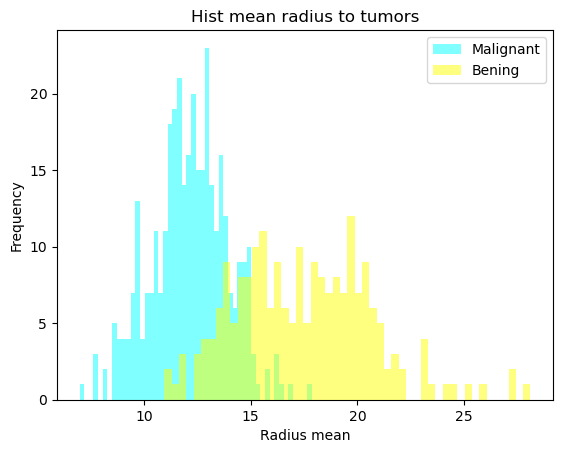

In [36]:
m = plt.hist(dt.loc[dt["Diagnosis"]=="Malignant", "mean radius"], 
             bins=50, alpha=0.5, label="Malignant",
             color="cyan")

b = plt.hist(dt.loc[dt["Diagnosis"]=="Bening", "mean radius"], 
             bins=50, alpha=0.5, label="Bening",
             color="yellow")

plt.legend()
plt.xlabel("Radius mean")
plt.ylabel("Frequency")
plt.title("Hist mean radius to tumors")

plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [38]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [39]:
X = dt.drop("Diagnosis", axis=1)
y = data.target # 0 ó 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [40]:
# params = {"n_neighbors": [3,5,7,9,11,13,15,17,19,21]}

In [41]:
model = KNeighborsClassifier()
print(model.get_params())

params = {"n_neighbors": np.arange(3,50,2), "p":[1,2,3,4]}
# p es la elevacion de la formula del tio ese

scorings = ["accuracy", "roc_auc"]


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


# Grid search con cross validation


In [42]:
n_cv = 5

grid_solver = GridSearchCV(estimator=model, param_grid=params, scoring=scorings, cv=n_cv, refit="roc_auc", verbose=2 )
# model es el knn, param, scring definidos antes

model_result = grid_solver.fit(X_train, y_train)

print("Mejor score:", model_result.best_score_)
print("Mejores parámetros:", model_result.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END .................................n_neighbors=3, p=1; total time=   0.2s
[CV] END .................................n_neighbors=3, p=1; total time=   0.2s
[CV] END .................................n_neighbors=3, p=1; total time=   0.2s
[CV] END .................................n_neighbors=3, p=1; total time=   0.2s
[CV] END .................................n_neighbors=3, p=1; total time=   0.2s
[CV] END .................................n_neighbors=3, p=2; total time=   0.3s
[CV] END .................................n_neighbors=3, p=2; total time=   0.4s
[CV] END .................................n_neighbors=3, p=2; total time=   0.3s
[CV] END .................................n_neighbors=3, p=2; total time=   0.3s
[CV] END .................................n_neighbors=3, p=2; total time=   0.3s
[CV] END .................................n_neighbors=3, p=3; total time=   0.3s
[CV] END .................................n_nei

In [43]:
print("Train score:", model_result.score(X_train,y_train))
print("Test score:", model_result.score(X_test,y_test))

Train score: 0.9847700432468396
Test score: 0.9867954911433172


In [44]:
import sklearn.metrics

# perdccion de la y en el train
y_pred = model_result.predict(X_train)
probs = model_result.predict_proba(X_train)
print("Train AUC:", sklearn.metrics.roc_auc_score(y_train, probs[:,1] ))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_train, y_pred ))

print("\n")
# perdccion de la y en el test
model_result.score(X_test,y_test)
y_pred = model_result.predict(X_test)
probs = model_result.predict_proba(X_test)
print("Test AUC:", sklearn.metrics.roc_auc_score(y_test, probs[:,1] ))
print("Test Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred ))


Train AUC: 0.9847700432468396
Train Accuracy: 0.9274725274725275


Test AUC: 0.9867954911433172
Test Accuracy: 0.9385964912280702


In [45]:
best_model = model_result.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=23, p=1)

In [46]:
final_model = best_model.fit(X,y)

In [47]:
results = model_result.cv_results_
results = pd.DataFrame(results)

In [48]:
results.head().T
# todos los combos en nuestro caso 50-2 / 2, unos 24 * 4 = 96 casos
# por los parametros de p que hemos puesto antes

,0,1,2,3,4
mean_fit_time,0.006,0.006183,0.006589,0.004188,0.005788
std_fit_time,0.002169,0.001323,0.004903,0.001162,0.001599
mean_score_time,0.29541,0.381965,0.404858,0.399643,0.265888
std_score_time,0.024273,0.033762,0.02278,0.026225,0.009494
param_n_neighbors,3,3,3,3,5
param_p,1,2,3,4,1
params,"{'n_neighbors': 3, 'p': 1}","{'n_neighbors': 3, 'p': 2}","{'n_neighbors': 3, 'p': 3}","{'n_neighbors': 3, 'p': 4}","{'n_neighbors': 5, 'p': 1}"
split0_test_accuracy,0.934066,0.923077,0.923077,0.923077,0.923077
split1_test_accuracy,0.945055,0.945055,0.934066,0.934066,0.945055
split2_test_accuracy,0.945055,0.934066,0.912088,0.923077,0.956044


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


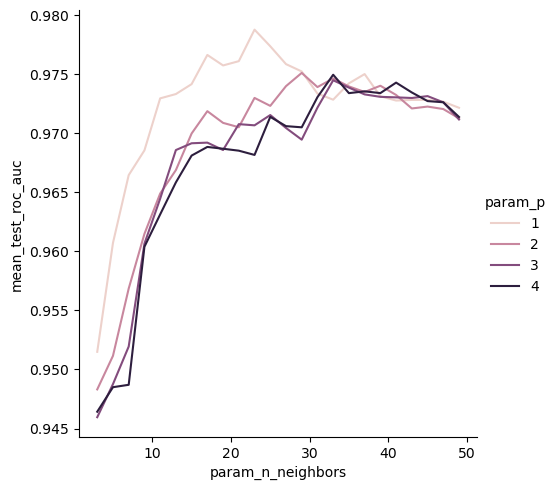

In [49]:
sns.relplot(x="param_n_neighbors", y= "mean_test_roc_auc", hue="param_p", kind="line", data=results)